<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/K_Means_Clustering_on_blood_cell_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and analyze blodd cell data

In [41]:
#import necessary libraries
import pandas
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy
import matplotlib.pyplot as plt
import seaborn

In [2]:
#read file
dataframe = pandas.read_table('/content/drive/MyDrive/AI_resources/flow-cytometry-40k.txt', sep = ' ', header = None)

In [3]:
#drop first column
column_to_drop = 0
column_axis = 1

dataframe = dataframe.drop([column_to_drop], column_axis)

<ipython-input-3-77624bf3177b>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataframe = dataframe.drop([column_to_drop], column_axis)


In [4]:
dataframe

,1,2,3,4,5
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


In [5]:
#name columns
dataframe.columns = ["FITC-CD3",
                     "PE-CD8",
                     "ECD-CD19",
                     "PC5-CD45",
                     "PC7-CD3"]

dataframe

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


Clean data with missing values

In [6]:
#drop row with NULL value
dataframe_copy = dataframe.copy()

row_axis = 0

dataframe_copy.dropna(axis = row_axis,
                      inplace = True)

dataframe_copy

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


In [7]:
#replace NULL value by the mean of the column
dataframe_copy = dataframe.copy()

average = dataframe_copy['FITC-CD3'].mean()

dataframe_copy.fillna(average, inplace = True)

dataframe_copy

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FITC-CD3  40000 non-null  float64
 1   PE-CD8    40000 non-null  float64
 2   ECD-CD19  40000 non-null  float64
 3   PC5-CD45  40000 non-null  float64
 4   PC7-CD3   40000 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde3dcee4c0>,
      dtype=object)

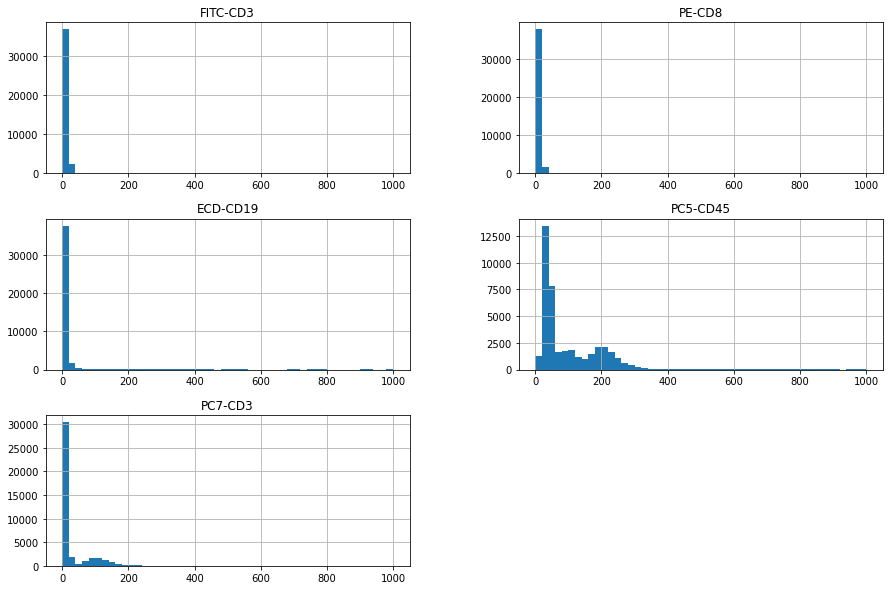

In [9]:
#check for outlier
dataframe.hist(bins = 50,
               figsize = (15, 10))

In [10]:
dataframe.describe()

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,8.245865,7.956326,6.102041,97.956974,30.004937
std,40.784917,27.655936,23.554925,94.014033,53.123582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.321794,2.037050,1.556398,34.118685,5.251889
50%,2.033236,3.025535,2.521517,49.346971,8.089073
75%,3.604177,8.543738,5.148893,161.842501,18.673915
max,999.970436,999.970436,999.970436,999.970436,999.970436


In [11]:
#remove outliers
dataframe = dataframe[dataframe["FITC-CD3"] < 20]

dataframe = dataframe[dataframe["PE-CD8"] < 50]

dataframe = dataframe[dataframe["ECD-CD19"] < 50]

dataframe = dataframe[dataframe["PC5-CD45"] < 400]

dataframe = dataframe[dataframe["PC7-CD3"] < 200]

dataframe

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3
0,4.315380,5.301481,3.892902,116.485707,11.284839
1,2.034189,3.378871,3.017428,63.537658,7.094390
2,19.018191,11.923801,5.848890,194.091982,98.327730
3,18.117922,14.278425,6.015783,227.966526,145.721575
4,6.203657,5.125051,2.734187,95.794769,12.134564
...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805
39996,3.795627,6.340987,3.256801,145.446916,14.008535
39997,1.364709,2.271654,2.296450,27.221706,2.868655
39998,2.260210,17.645853,27.465847,264.618172,25.784517


Process data for machine learning

In [12]:
#standardize data
scaler = StandardScaler()

dataframe_standardized = scaler.fit_transform(dataframe)

dataframe_standardized

array([[ 0.24223226,  0.02134713, -0.04862649,  0.43899562, -0.26972265],
       [-0.29129674, -0.33236866, -0.18684457, -0.27777208, -0.3907205 ],
       [ 3.68095151,  1.23970151,  0.260181  ,  1.48956637,  2.2436127 ],
       ...,
       [-0.4478759 , -0.53607106, -0.30067122, -0.76938797, -0.51273723],
       [-0.23843454,  2.29242707,  3.67302323,  2.44429268,  0.14895087],
       [-0.08609328,  2.96810143,  0.93019238,  1.51352748,  1.44966408]])

In [14]:
#normalize data
normalization = MinMaxScaler()

dataframe_normalized = normalization.fit_transform(dataframe)

dataframe_normalized

array([[0.21581533, 0.15552261, 0.07792456, 0.29260253, 0.0565934 ],
       [0.10173129, 0.09912153, 0.06040012, 0.15960138, 0.03557832],
       [0.95111365, 0.34979297, 0.11707773, 0.48754312, 0.49311295],
       ...,
       [0.06825011, 0.06664056, 0.04596823, 0.06837869, 0.01438629],
       [0.11303477, 0.51765331, 0.54978619, 0.66469912, 0.12930919],
       [0.14560977, 0.62539167, 0.20202734, 0.49198927, 0.35521886]])

In [15]:
average_dataframe = dataframe.describe().loc["mean"].values

average_dataframe

array([ 3.27967646,  5.18544905,  4.20090265, 84.05684422, 20.62598756])

In [17]:
#compute averages of standardized dataframe
standardized_averages = []

number_of_features = 5

for feature in range(number_of_features):
  standardized_averages.append(dataframe_standardized[:, feature].mean())

standardized_averages

[-1.2891777373683814e-16,
 3.533589581341045e-17,
 -3.261774998160965e-17,
 2.9899604149808845e-17,
 -4.5043559498413327e-17]

In [18]:
#compute averages of normalized dataframe
normalized_averages = []

number_of_features = 5

for feature in range(number_of_features):
  normalized_averages.append(dataframe_normalized[:, feature].mean())

normalized_averages

[0.1640190178635346,
 0.15211873993825842,
 0.0840898270384112,
 0.21114388997103622,
 0.10343919741667634]

Reduce data dimensionality with principal component analysis

In [20]:
number_of_dimensions = 2

pca = PCA(n_components = number_of_dimensions)

In [21]:
scaler = StandardScaler()

normalized_data = scaler.fit_transform(dataframe)

data_reduced = pca.fit_transform(normalized_data)

data_reduced

array([[ 0.17861723, -0.0154594 ],
       [-0.6639843 ,  0.12160097],
       [ 3.80886246, -2.624901  ],
       ...,
       [-1.17366861,  0.09652186],
       [ 3.80259956,  3.13084176],
       [ 3.28702832,  0.88094509]])

In [25]:
#check information retained
information_retained = pca.explained_variance_ratio_

information_retained

array([0.6667969 , 0.23149491])

In [26]:
numpy.sum(information_retained)

0.8982918118292859

Build a K Means clustering

In [30]:
#determine optimal number of clusters
minimum_clusters = 2
maximum_clusters = 15
iteration_value = 1
distortions = []
silhouette_scores = []

for cluster in range(minimum_clusters, maximum_clusters, iteration_value):
  model = KMeans(n_clusters = cluster,
                 init = "k-means++",
                 n_init = 10,
                 max_iter = 100,
                 random_state = 0)

  model.fit(normalized_data)

  distortions.append(model.inertia_)

  silhouette_scores.append(silhouette_score(normalized_data,
                                            model.labels_,
                                            metric = "euclidean"))

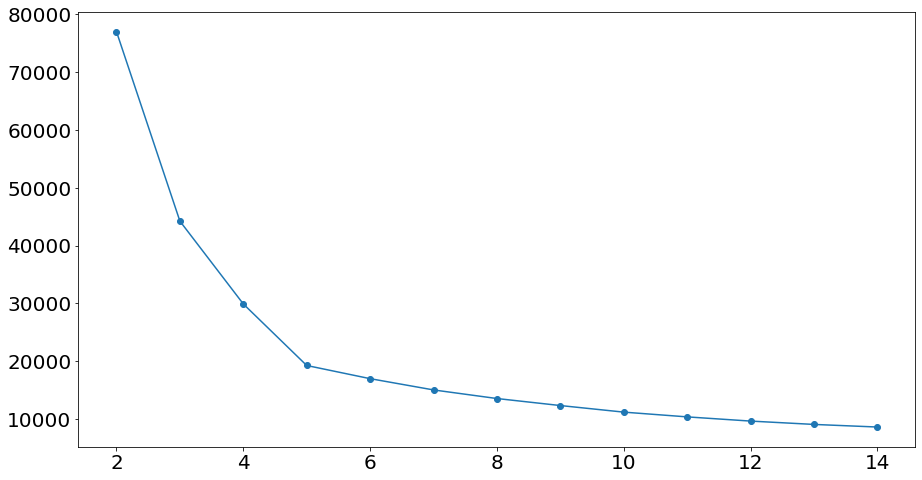

In [33]:
#plot distortions to find optimal number of clusters
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams.update({"font.size": 20})
plt.plot(range(minimum_clusters, maximum_clusters, iteration_value), distortions, marker = 'o')

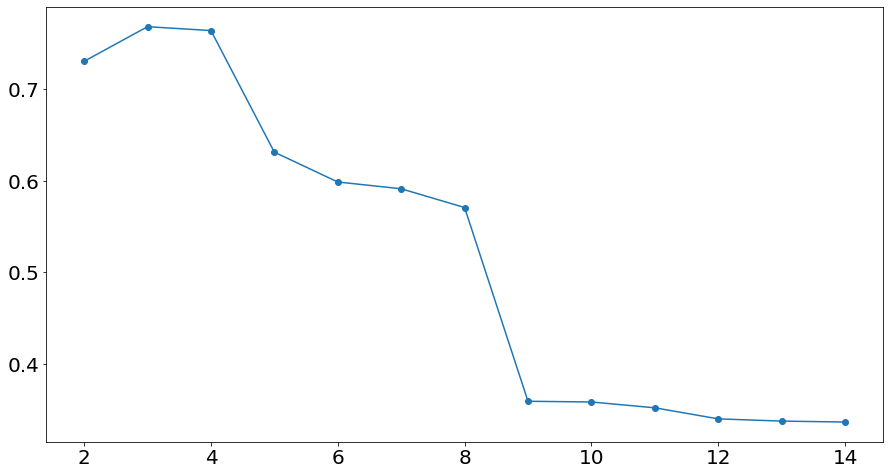

In [53]:
#plot silhouettes to find optimal number of clusters
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams.update({"font.size": 20})
plt.plot(range(minimum_clusters, maximum_clusters, iteration_value), silhouette_scores, marker = 'o')

Visualize clusters

In [54]:
#Use 5 clusters to classify data
optimal_clusters = 5
model = KMeans(n_clusters = optimal_clusters,
               init = "k-means++",
               n_init = 10,
               max_iter = 100,
               random_state = 0)

model.fit(normalized_data)

KMeans(max_iter=100, n_clusters=5, random_state=0)

In [55]:
clusters = model.labels_

In [56]:
#add clusters to initial dataframe
dataframe["Cluster"] = clusters

dataframe

,FITC-CD3,PE-CD8,ECD-CD19,PC5-CD45,PC7-CD3,Cluster
0,4.315380,5.301481,3.892902,116.485707,11.284839,3
1,2.034189,3.378871,3.017428,63.537658,7.094390,0
2,19.018191,11.923801,5.848890,194.091982,98.327730,1
3,18.117922,14.278425,6.015783,227.966526,145.721575,1
4,6.203657,5.125051,2.734187,95.794769,12.134564,3
...,...,...,...,...,...,...
39995,2.020838,2.534869,1.887323,59.295711,9.926805,0
39996,3.795627,6.340987,3.256801,145.446916,14.008535,3
39997,1.364709,2.271654,2.296450,27.221706,2.868655,0
39998,2.260210,17.645853,27.465847,264.618172,25.784517,4


In [57]:
#convert data_reduced array to dataframe to use for plotting
data_reduced = pandas.DataFrame(data_reduced,
                                columns = ["Principal Component 1", "Principal Component 2"])

data_reduced["Cluster"] = clusters

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


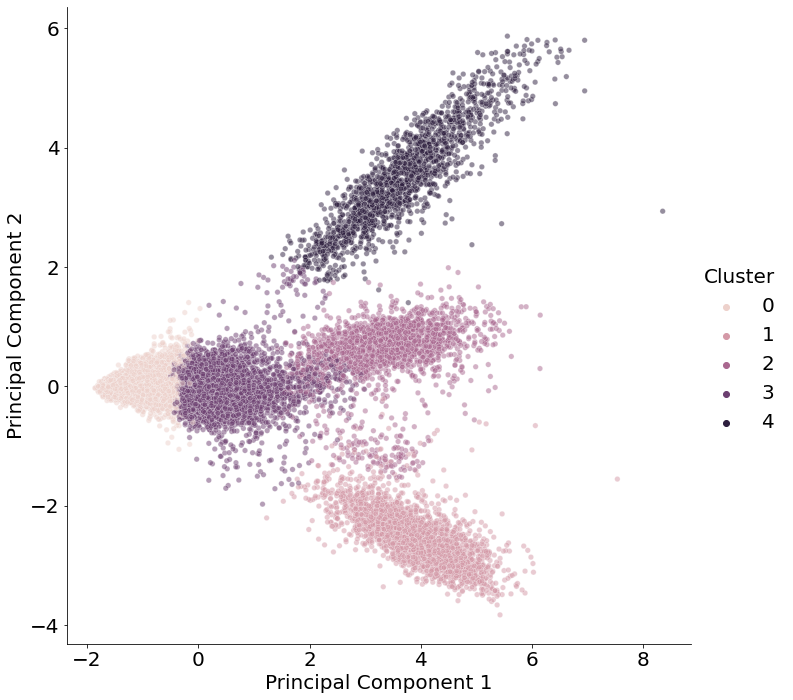

In [58]:
#visualize clusters
seaborn.pairplot(x_vars = "Principal Component 1",
                 y_vars = "Principal Component 2",
                 data = data_reduced,
                 hue = "Cluster",
                 size = 10,
                 plot_kws = dict(alpha = 0.5, s = 30))